In [3]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns

In [6]:
df = pd.read_csv('df_master91.csv')

In [10]:
df.head()

,Unnamed: 0,zipcode,median_income,population,county,median_rent,restaurant_count,recycling_bin_count,num_subway_entrances,subway_bracket
0,0,10001,71244.6100,17678,New York County,3400.0,488.0,1.0,51.0,"(6, 72]"
1,1,10002,30843.9574,70878,New York County,3050.0,509.0,10.0,19.0,"(6, 72]"
2,2,10003,89998.5339,53609,New York County,3750.0,682.0,7.0,28.0,"(6, 72]"
3,3,10004,110183.6857,1271,New York County,3876.0,145.0,3.0,6.0,"(0, 6]"
4,4,10005,115133.2855,1517,New York County,3910.0,72.0,3.0,0.0,0


In [11]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'median_income', 'population', 'county',
       'median_rent', 'restaurant_count', 'recycling_bin_count',
       'num_subway_entrances', 'subway_bracket'],
      dtype='object')

In [13]:
#df[['median_income', 'population', 'county', 'median_rent',
#       'restaurant_count', 'recycling_bin_count', 'num_subway_entrances',
#       'subway_bracket']].hist(figsize  = [18, 18])

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(18, 6))
for idx, dollars in enumerate(['median_rent_07_to_11', 'median_rent_12_to_16']):
    df_combined.plot(kind='scatter', x=dollars, y='median_income_07_to_11', ax=axs[idx], label=dollars)
plt.legend()
plt.show()

In [17]:
df_pairplot = df[['median_income','population', 'median_rent', 'restaurant_count', 'recycling_bin_count', 'num_subway_entrances']]

In [18]:
df_pairplot

,median_income,population,median_rent,restaurant_count,recycling_bin_count,num_subway_entrances
0,71244.6100,17678,3400.0,488.0,1.0,51.0
1,30843.9574,70878,3050.0,509.0,10.0,19.0
2,89998.5339,53609,3750.0,682.0,7.0,28.0
3,110183.6857,1271,3876.0,145.0,3.0,6.0
4,115133.2855,1517,3910.0,72.0,3.0,0.0
5,111220.0000,972,3700.0,45.0,2.0,30.0
6,145458.7823,3520,6325.0,141.0,9.0,26.0
7,56615.2777,56975,3350.0,311.0,13.0,4.0
8,93702.0061,27322,3500.0,259.0,0.0,0.0
9,92359.4888,45899,3695.0,455.0,1.0,72.0


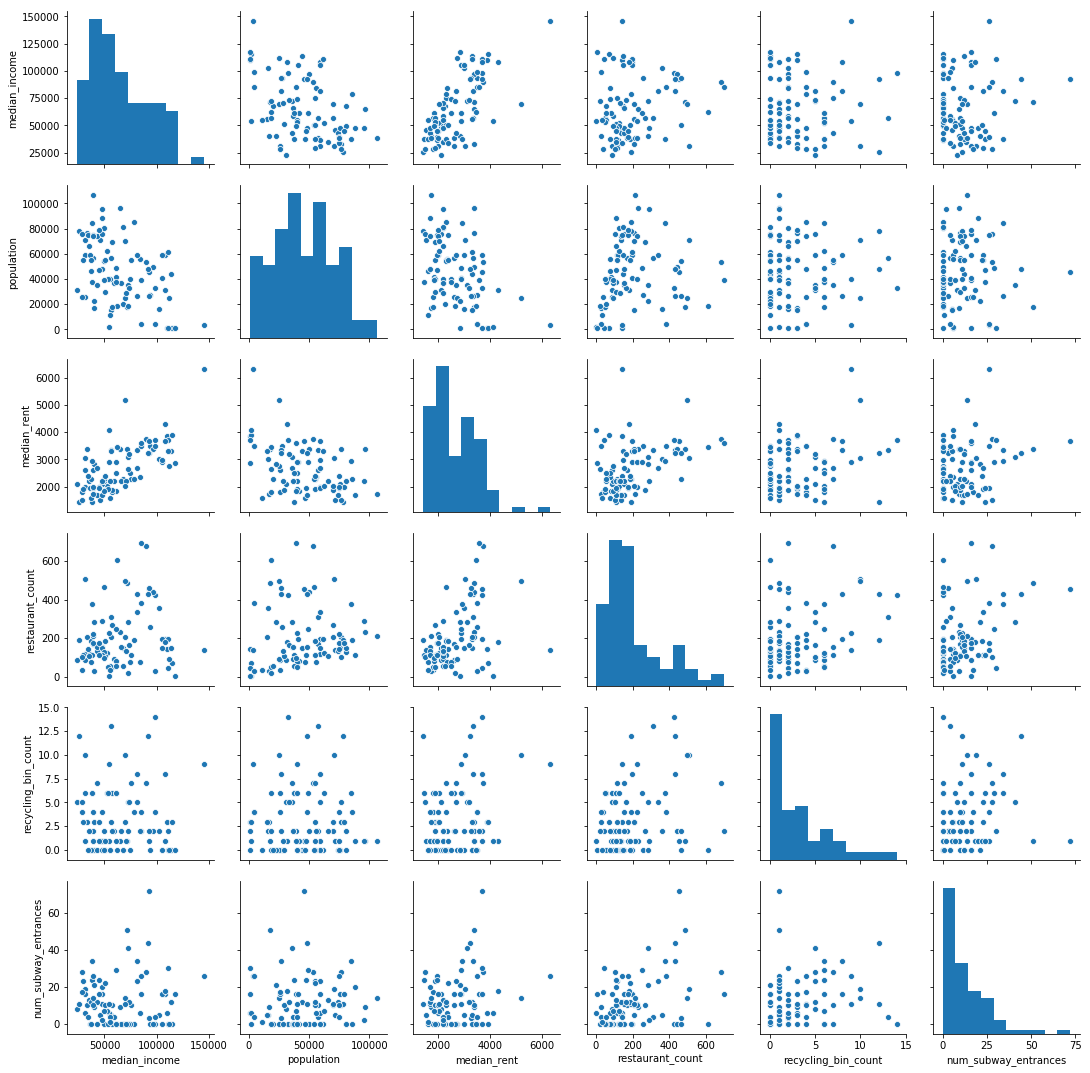

In [20]:
sns.pairplot(df_pairplot).savefig('pairplot91.png')

In [46]:
df_pairplot_ny = df[df.county == 'New York County'][['median_income','population', 'median_rent', 'restaurant_count', 'recycling_bin_count', 'num_subway_entrances']]
df_pairplot_kings = df[df.county == 'Kings County'][['median_income','population', 'median_rent', 'restaurant_count', 'recycling_bin_count', 'num_subway_entrances']]
df_pairplot_queens = df[df.county == 'Queens County'][['median_income','population', 'median_rent', 'restaurant_count', 'recycling_bin_count', 'num_subway_entrances']]
df_pairplot_richmond = df[df.county == 'Richmond County'][['median_income','population', 'median_rent', 'restaurant_count', 'recycling_bin_count', 'num_subway_entrances']]
df_pairplot_bronx = df[df.county == 'Bronx County'][['median_income','population', 'median_rent', 'restaurant_count', 'recycling_bin_count', 'num_subway_entrances']]



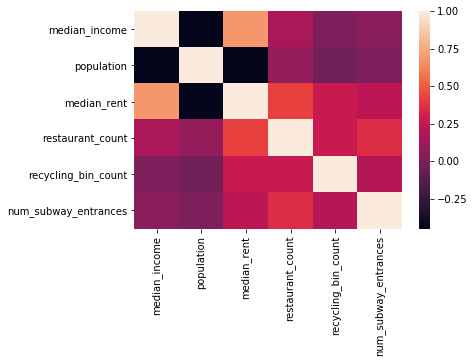

In [22]:
sns.heatmap(df_pairplot.corr())

In [23]:
df_pairplot.corr()

,median_income,population,median_rent,restaurant_count,recycling_bin_count,num_subway_entrances
median_income,1.000000,-0.446951,0.684690,0.167998,0.014970,0.051487
population,-0.446951,1.000000,-0.435405,0.095260,-0.025097,0.013979
median_rent,0.684690,-0.435405,1.000000,0.425214,0.269473,0.227123
restaurant_count,0.167998,0.095260,0.425214,1.000000,0.269489,0.358426
recycling_bin_count,0.014970,-0.025097,0.269473,0.269489,1.000000,0.200149
num_subway_entrances,0.051487,0.013979,0.227123,0.358426,0.200149,1.000000


Text(0.5, 1.0, 'Manhattan')

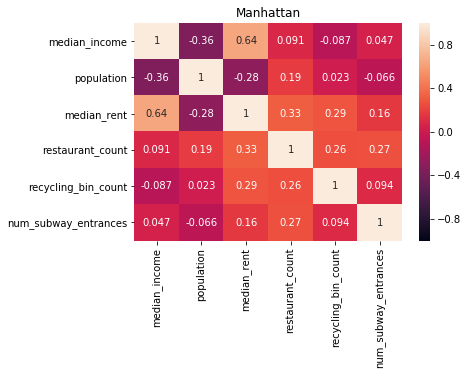

In [42]:
sns.heatmap(df_pairplot_ny.corr(),vmin=-1, vmax=1, annot = True)
plt.title('Manhattan')
#sns.heatmap(df_pairplot_kings.corr())
#sns.heatmap(df_pairplot_queens.corr())

Text(0.5, 1.0, 'Brooklyn')

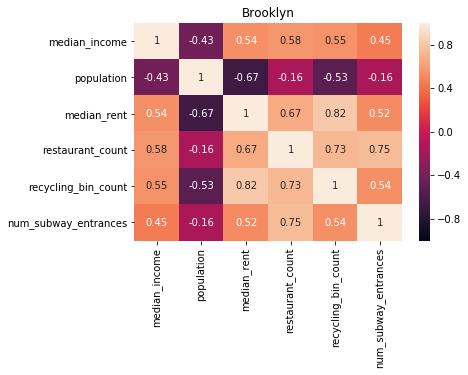

In [43]:
sns.heatmap(df_pairplot_kings.corr(),vmin=-1, vmax=1, annot = True)
plt.title('Brooklyn')
plt.savefig('corr_heatmap_brooklyn')

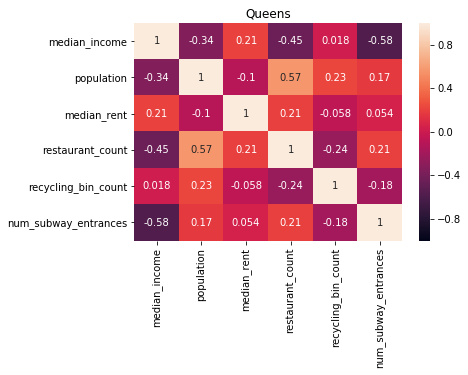

In [52]:
sns.heatmap(df_pairplot_queens.corr(),vmin=-1, vmax=1, annot = True)
plt.title('Queens')
plt.savefig('corr_heatmap_queens')

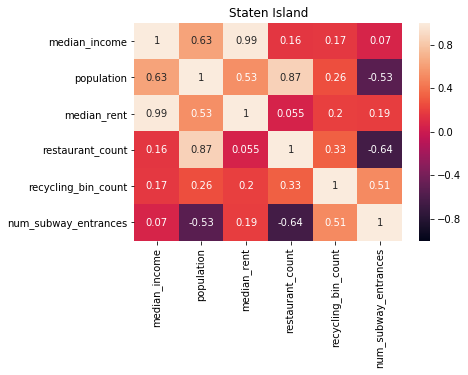

In [51]:
sns.heatmap(df_pairplot_richmond.corr(),vmin=-1, vmax=1, annot = True)
plt.title('Staten Island')
plt.savefig('corr_heatmap_staten')

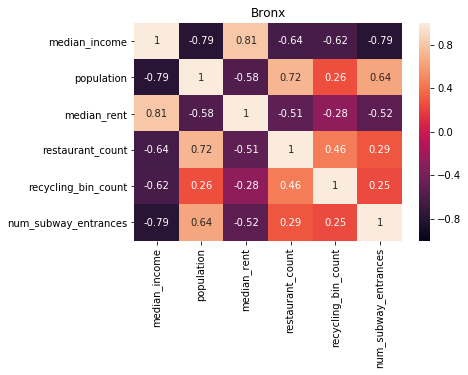

In [50]:
sns.heatmap(df_pairplot_bronx.corr(),vmin=-1, vmax=1, annot = True)
plt.title('Bronx')
plt.savefig('corr_heatmap_bronx')